In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [ ]:
def calculate_t_test(df1,df2,columns):
    
    sta_list = []
    pvalue_list = []
    
    for col in columns:
        
        series_1 = df1[col]
        series_2 = df2[col]
        sta,pvalue = stats.ttest_ind(series_1,series_2,equal_var=False)
        
        sta_list.append(sta)
        pvalue_list.append(pvalue)
    
    sta_list = pd.Series(sta_list)
    pvalue_list = pd.Series(pvalue_list)
    
    sta_list.index = columns
    pvalue_list.index = columns
    
    
    sta_df = pd.DataFrame(sta_list).round(2)
    pvalue_df = pd.DataFrame(pvalue_list)
    p = pvalue_df.applymap(lambda x: ''.join(['*' for t in [0.01,0.5,0.1] if x<=t]))
    
    ttest_df = sta_df.astype(str) + p
    
    return ttest_df

In [189]:
def calculate_correlation_df(agg_df):
    
    corr_df = agg_df.corr()
    corr_df = corr_df.round(3)
    
    rho = corr_df
    pval = agg_df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
    p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.10] if x<=t]))
    corr_p_df = rho.astype(str) + p
    return corr_p_df

In [169]:
data_directory = "data/index/"

In [170]:
file = "index_refinement_agg_monthly.csv"

In [171]:
df = pd.read_csv(data_directory+file)

In [172]:
df["date"] = pd.to_datetime(df["date"])
df_ori = df.set_index("date")

In [173]:
file = "index_refinement_agg_monthly_CWHY.csv"

In [174]:
df = pd.read_csv(data_directory+file)
df["date"] = pd.to_datetime(df["date"])
df_cwhy = df.set_index("date")

In [178]:
index_2 = df_cwhy["economy_ref"]

In [179]:
index_1 = df_ori["economy"]

In [184]:
index_economy = pd.concat([index_1,index_2],axis=1).dropna()

In [186]:
index_economy.corr()

,economy,economy_ref
economy,1.000000,0.455761
economy_ref,0.455761,1.000000


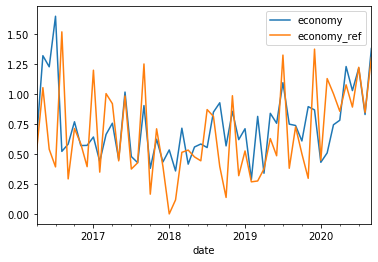

In [188]:
index_economy.plot()

In [192]:
calculate_correlation_df(index_economy)

,economy,economy_ref
economy,1.0***,0.456***
economy_ref,0.456***,1.0***


In [196]:
main_index_df_ori_list = ["economy","finance","reform","regulation","intervention_x"]

In [197]:
main_index_df_ori = df_ori[main_index_df_ori_list]

In [199]:
main_index_df_ori.columns = ["economy","finance","reform","regulation","intervention"]

In [202]:
main_index_df_cwhy_list = ["economy_ref","finance_ref","reform_ref","regulation_ref","intervention_ref"]

In [203]:
main_index_df_cwhy = df_cwhy[main_index_df_cwhy_list]

In [205]:
main_index_df_cwhy.columns = ["economy_ref","finance","reform","regulation","intervention"]

In [209]:
new_df = pd.concat([main_index_df_ori,main_index_df_cwhy],axis=1).dropna()

In [213]:
corr_df = calculate_correlation_df(new_df)

In [214]:
corr_df

,economy,finance,reform,regulation,intervention,economy,finance,reform,regulation,intervention
economy,1.0***,0.544***,0.335**,0.147,0.338**,0.456***,0.278**,0.098,0.042,0.19
finance,0.544***,1.0***,0.313**,0.044,0.551***,0.252*,0.49***,-0.028,-0.127,0.291**
reform,0.335**,0.313**,1.0***,0.357***,0.169,-0.022,0.043,0.535***,0.16,-0.014
regulation,0.147,0.044,0.357***,1.0***,0.306**,-0.032,-0.068,0.051,0.547***,-0.076
intervention,0.338**,0.551***,0.169,0.306**,1.0***,0.238*,0.377***,-0.234*,-0.203,0.523***
economy,0.456***,0.252*,-0.022,-0.032,0.238*,1.0***,0.142,-0.247*,-0.1,0.173
finance,0.278**,0.49***,0.043,-0.068,0.377***,0.142,1.0***,-0.245*,-0.136,0.767***
reform,0.098,-0.028,0.535***,0.051,-0.234*,-0.247*,-0.245*,1.0***,0.087,-0.165
regulation,0.042,-0.127,0.16,0.547***,-0.203,-0.1,-0.136,0.087,1.0***,-0.352***
intervention,0.19,0.291**,-0.014,-0.076,0.523***,0.173,0.767***,-0.165,-0.352***,1.0***


In [216]:
corr_df = new_df.corr()
corr_df = corr_df.round(3)

In [218]:
corr_df.iloc[5:,0:5]

,economy,finance,reform,regulation,intervention
economy,0.456,0.252,-0.022,-0.032,0.238
finance,0.278,0.490,0.043,-0.068,0.377
reform,0.098,-0.028,0.535,0.051,-0.234
regulation,0.042,-0.127,0.160,0.547,-0.203
intervention,0.190,0.291,-0.014,-0.076,0.523


In [222]:
corr_df = new_df.corr()
corr_df = corr_df.round(3)
    
rho = corr_df
pval = new_df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.10] if x<=t]))
corr_p_df = rho.astype(str) + p

In [224]:
pval.iloc[5:,0:5]

,economy,finance,reform,regulation,intervention
economy,0.000534,0.066334,0.872408,0.819160,0.083729
finance,0.041902,0.000168,0.758402,0.623021,0.004918
reform,0.482014,0.843188,0.000031,0.716252,0.088157
regulation,0.762678,0.359438,0.246336,0.000019,0.140705
intervention,0.168910,0.033072,0.920904,0.586203,0.000049


In [226]:
sta = new_df.corr(method=lambda x, y: pearsonr(x, y)[0])

In [227]:
sta

,economy,finance,reform,regulation,intervention,economy,finance,reform,regulation,intervention
economy,1.000000,0.544284,0.334955,0.146638,0.338280,0.455761,0.277882,0.097733,0.042058,0.189946
finance,0.544284,1.000000,0.313057,0.043927,0.550617,0.251719,0.490270,-0.027559,-0.127180,0.290532
reform,0.334955,0.313057,1.000000,0.357071,0.169184,-0.022376,0.042839,0.534991,0.160490,-0.013835
regulation,0.146638,0.043927,0.357071,1.000000,0.306126,-0.031849,-0.068417,0.050615,0.547147,-0.075742
intervention,0.338280,0.550617,0.169184,0.306126,1.000000,0.237525,0.377288,-0.234288,-0.203129,0.523094
economy,0.455761,0.251719,-0.022376,-0.031849,0.237525,1.000000,0.142348,-0.247064,-0.099955,0.173351
finance,0.277882,0.490270,0.042839,-0.068417,0.377288,0.142348,1.000000,-0.245261,-0.136132,0.766668
reform,0.097733,-0.027559,0.534991,0.050615,-0.234288,-0.247064,-0.245261,1.000000,0.086838,-0.165347
regulation,0.042058,-0.127180,0.160490,0.547147,-0.203129,-0.099955,-0.136132,0.086838,1.000000,-0.351817
intervention,0.189946,0.290532,-0.013835,-0.075742,0.523094,0.173351,0.766668,-0.165347,-0.351817,1.000000
